In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("glass.xlsx")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


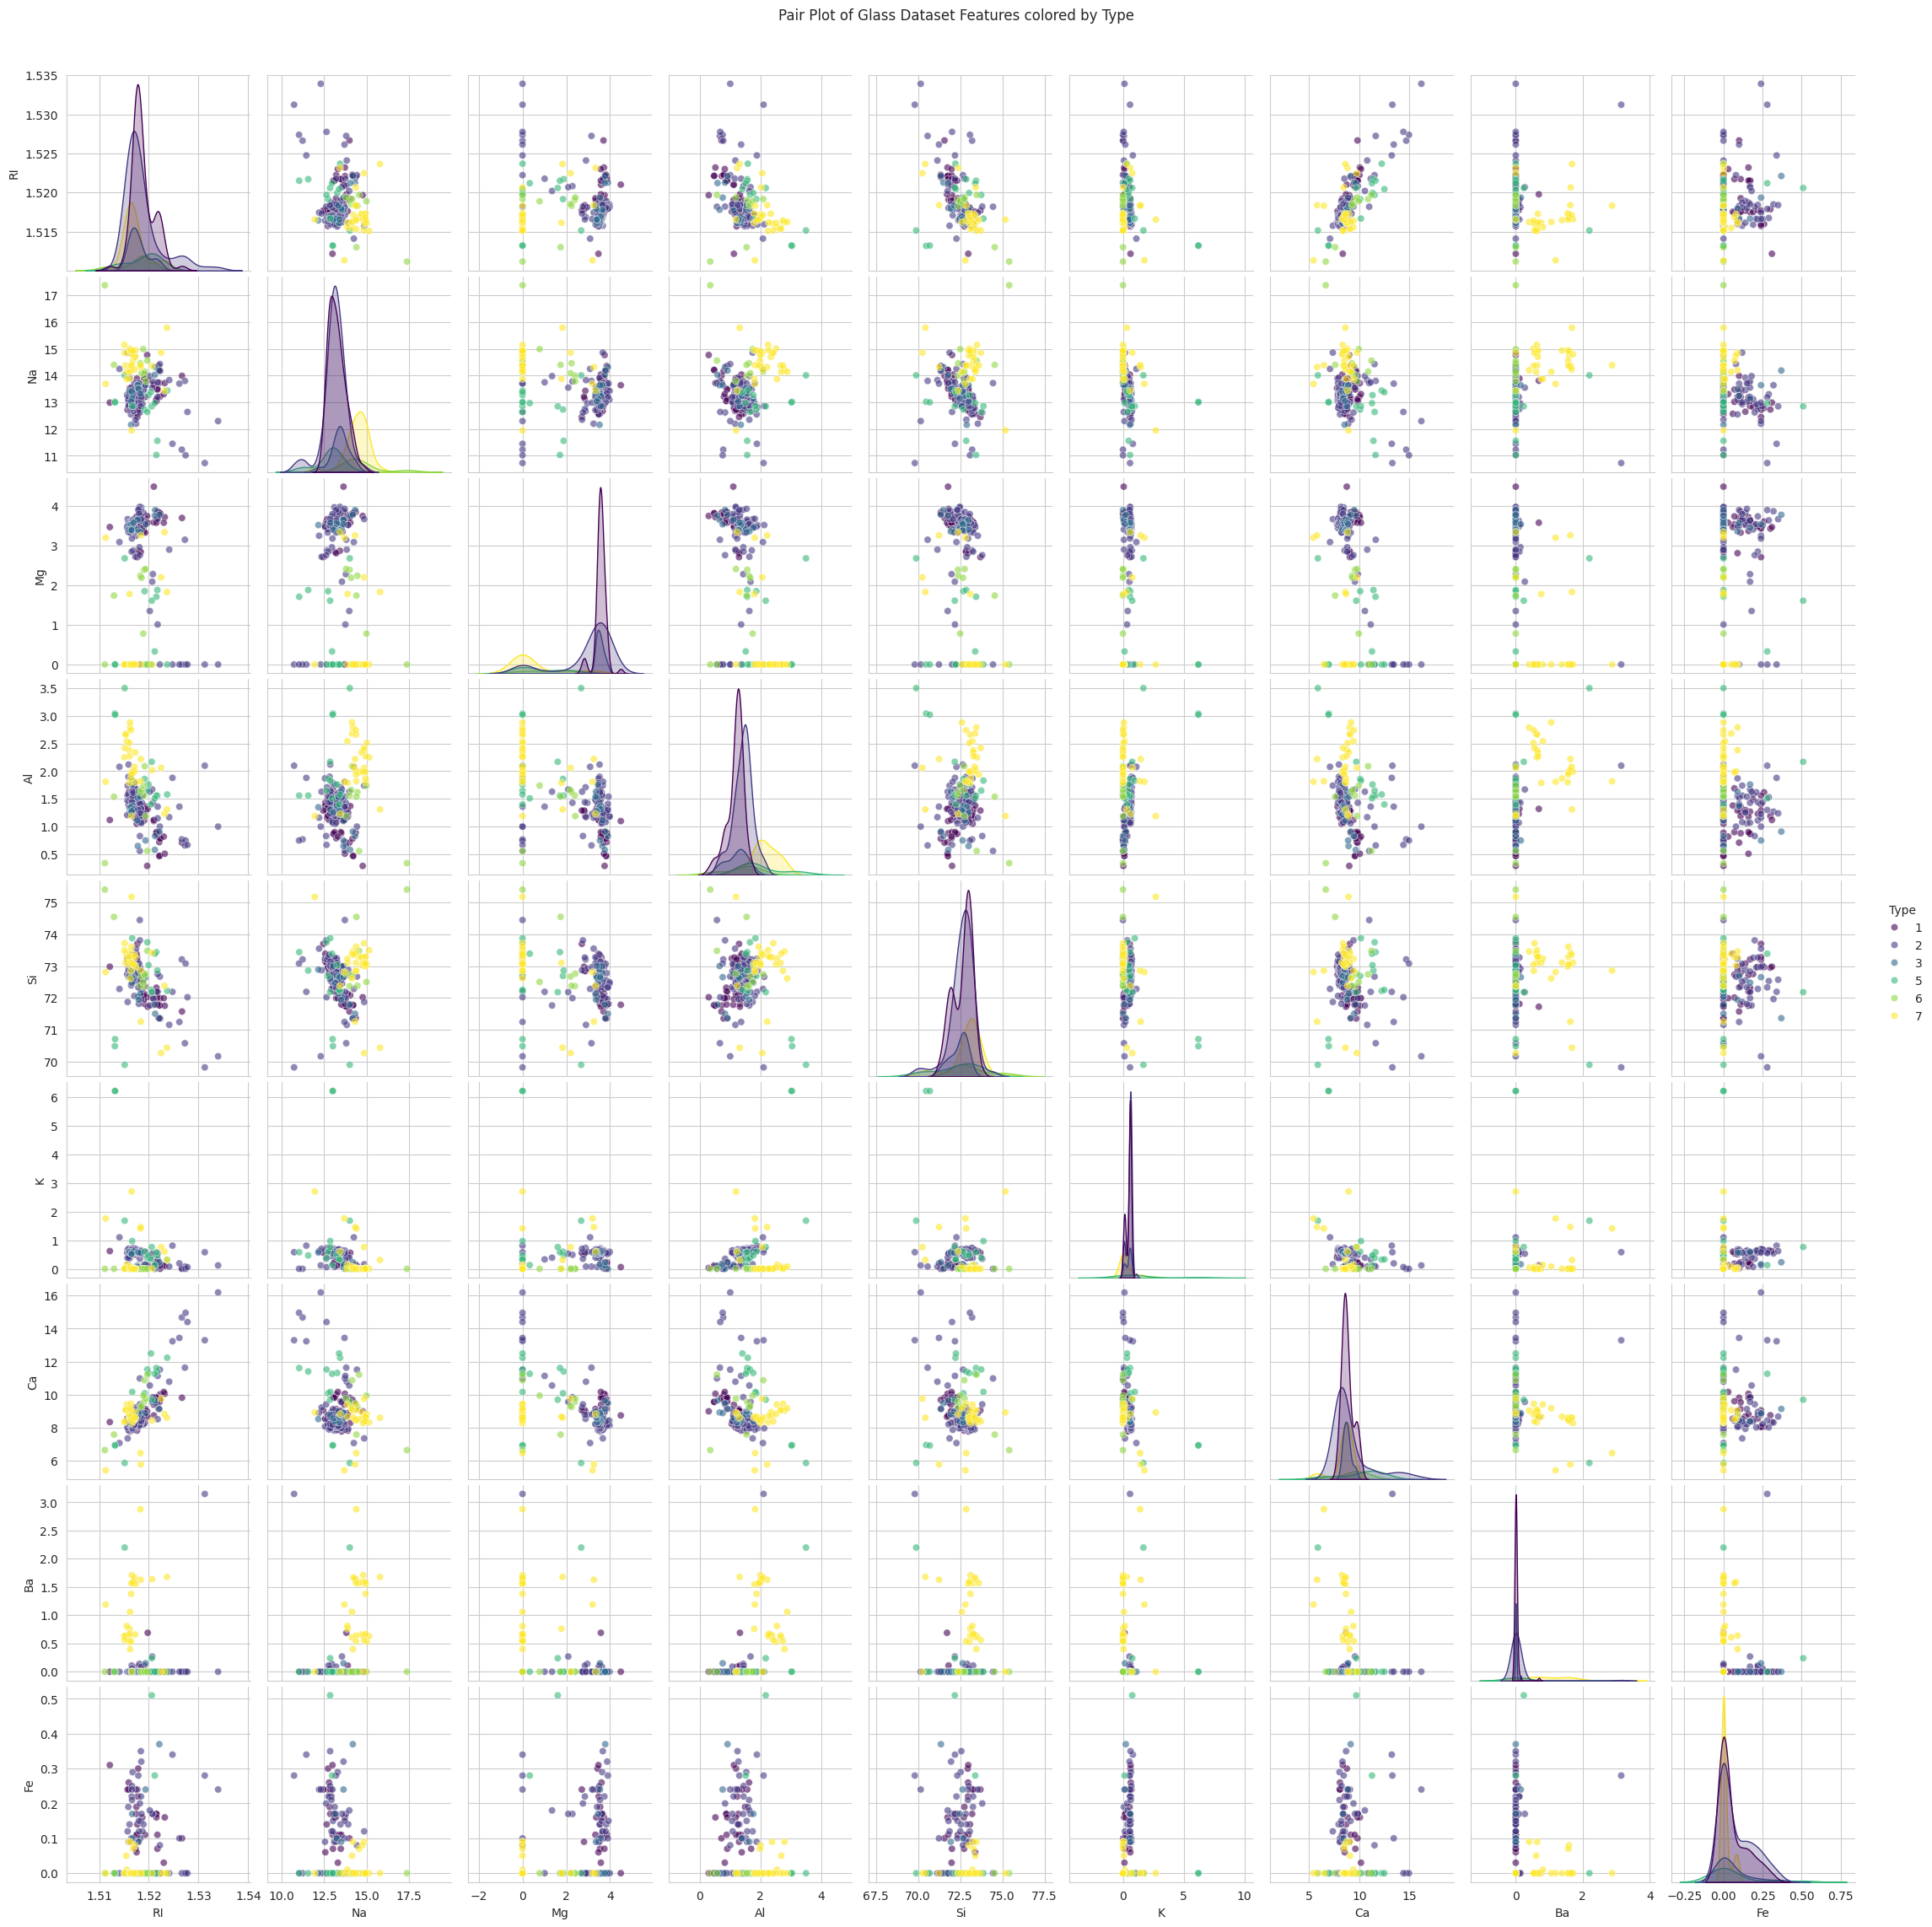

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df, hue='Type', diag_kind='kde', palette='viridis', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Glass Dataset Features colored by Type', y=1.02)
plt.show()

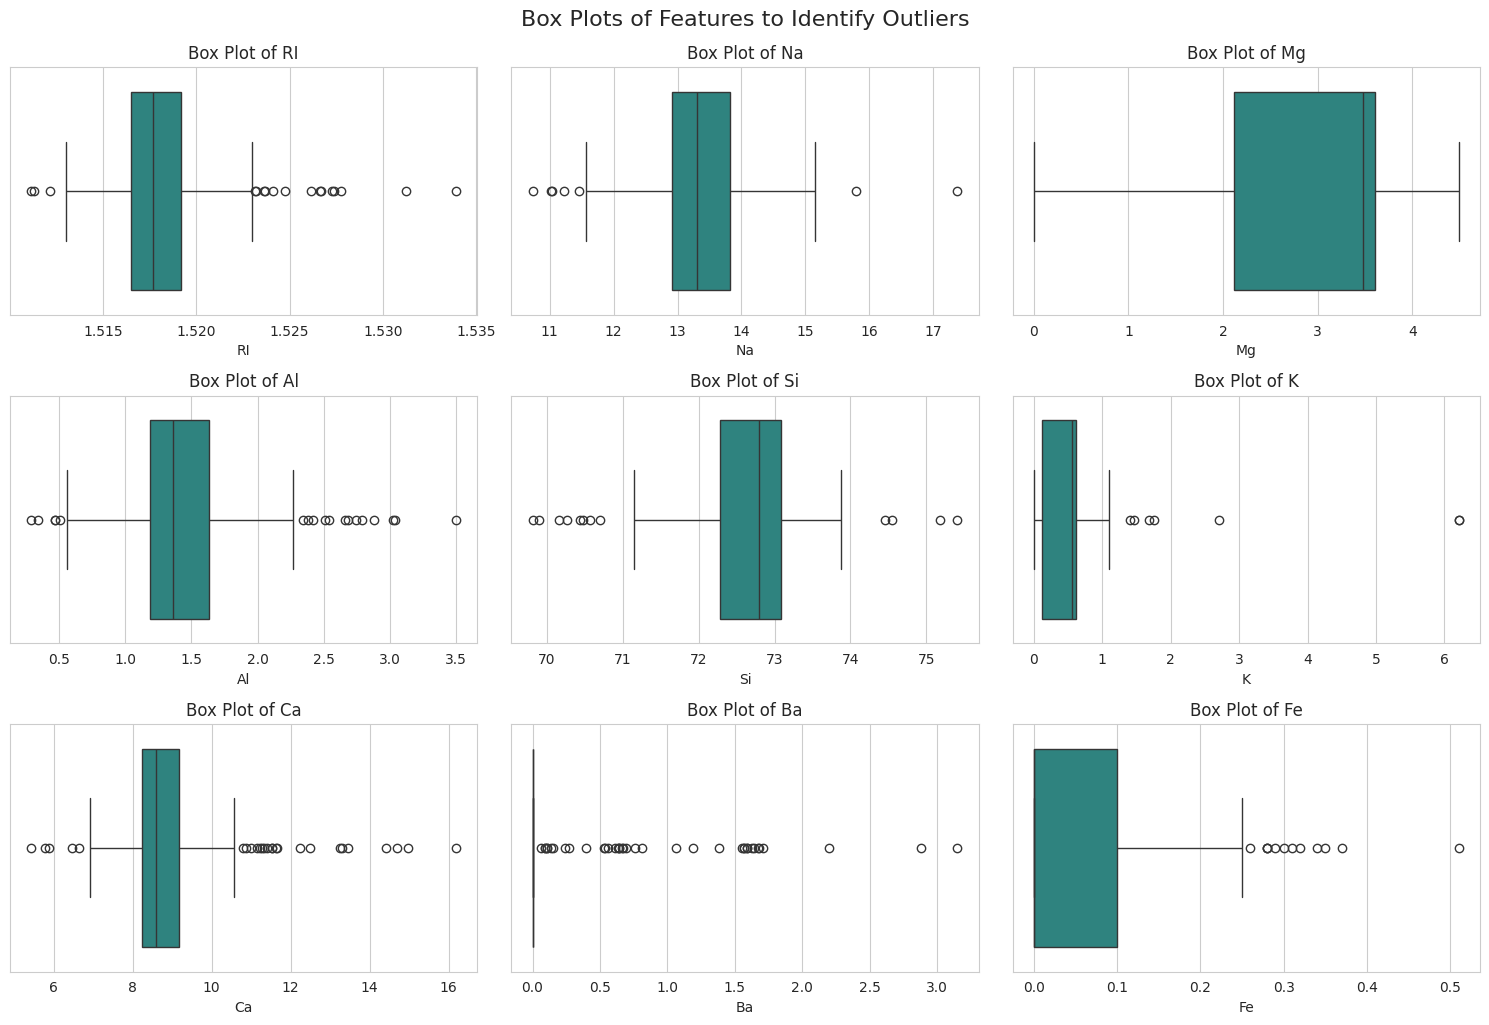

In [ ]:
numerical_cols = df.columns.drop('Type')
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], palette='viridis')
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.xlabel(col)
plt.tight_layout()
plt.suptitle('Box Plots of Features to Identify Outliers', y=1.02, fontsize=16)
plt.show()

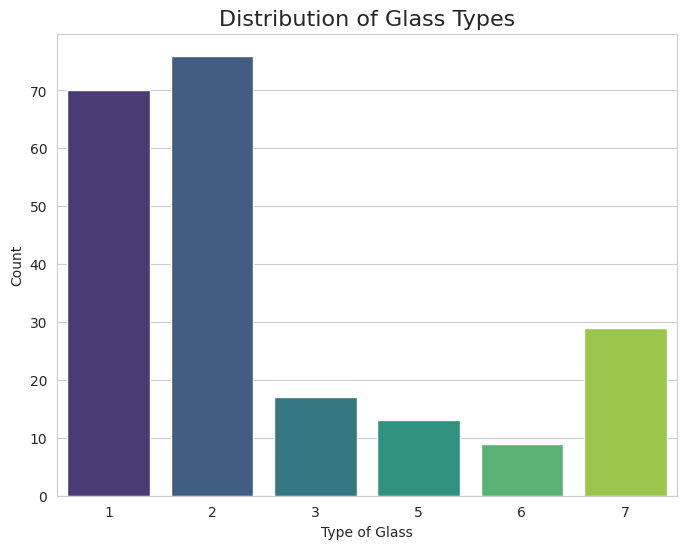

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df, palette='viridis')
plt.title('Distribution of Glass Types', fontsize=16)
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.show()

In [ ]:
X = df.drop('Type', axis=1)
y = df['Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
len(X_train)

149

In [ ]:
len(X_test)

65

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 3, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1, 2,
       1, 6, 2, 1, 5, 1, 1, 1, 1, 2, 1, 2, 7, 2, 5, 1, 2, 2, 1, 7, 2])

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Accuracy: 0.7692
Precision: 0.7662
Recall: 0.7692
F1-Score: 0.7601


In [ ]:
print(classification_report(y_test, y_pred_rf, zero_division=0))

              precision    recall  f1-score   support

           1       0.74      0.89      0.81        19
           2       0.75      0.65      0.70        23
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65



In [ ]:
print("\nTraining a Bagging Classifier...")
bagging_model = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_estimators=10,
    random_state=42
)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)


Training a Bagging Classifier...


In [ ]:
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted', zero_division=0)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")
print(f"Bagging Classifier F1-Score: {f1_bagging:.4f}")

Bagging Classifier Accuracy: 0.7692
Bagging Classifier F1-Score: 0.7578


In [ ]:
# Training a Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
y_pred_boosting

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 3, 1, 2, 1, 7, 1, 2,
       1, 6, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 7, 1, 2, 1, 2, 2, 1, 7, 2])

In [ ]:
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted', zero_division=0)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_boosting:.4f}")
print(f"Gradient Boosting Classifier F1-Score: {f1_boosting:.4f}")

Gradient Boosting Classifier Accuracy: 0.8000
Gradient Boosting Classifier F1-Score: 0.7888


In [ ]:
# Comparison of Model Performance

results = pd.DataFrame({
    'Model': ['Random Forest', 'Bagging Classifier', 'Gradient Boosting'],
    'Accuracy': [accuracy_rf, accuracy_bagging, accuracy_boosting],
    'F1-Score': [f1_rf, f1_bagging, f1_boosting]
})

In [ ]:
results

,Model,Accuracy,F1-Score
0,Random Forest,0.769231,0.760129
1,Bagging Classifier,0.769231,0.757758
2,Gradient Boosting,0.800000,0.788811


In [ ]:
print("The results above compare the performance of the three models.")

The results above compare the performance of the three models.


INTERVIEW QUESTIONS

**1. Bagging vs. Boosting**

Bagging: Trains multiple models independently on different random subsets of the data and averages their results. It reduces variance and prevents overfitting. Think of it as a parallel effort.

Boosting: Trains models sequentially, with each new model focusing on correcting the mistakes of the previous one. It reduces bias and turns a series of weak models into one strong one. Think of it as a collaborative, step-by-step effort.

**2. Handling Imbalanced Data**

Problem: When one class is much bigger than others, models get lazy and just predict the majority class.

Solution:

Oversampling (SMOTE): Create fake, similar examples of the minority class to make it bigger.

Undersampling: Remove examples from the majority class to make it smaller.

Class Weighting: Tell the model to pay more attention to the minority class by assigning it a higher penalty for mistakes.